In [33]:
import requests
from bs4 import BeautifulSoup

In [34]:
response=requests.get('https://www.airlinequality.com/airline-reviews/british-airways/page/1/?pagesize=3000')
response

<Response [200]>

In [35]:
response.headers

{'Date': 'Sun, 25 Jun 2023 23:41:03 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'x-powered-by': 'PHP/7.4.33, PleskLin', 'expires': 'Thu, 19 Nov 1981 08:52:00 GMT', 'Cache-Control': 'no-store, no-cache, must-revalidate', 'pragma': 'no-cache', 'link': '<https://www.airlinequality.com/wp-json/>; rel="https://api.w.org/"', 'set-cookie': 'PHPSESSID=rpbn7ta9hpv25tnnaoa2kf126i; path=/; secure; HttpOnly', 'vary': 'Accept-Encoding,User-Agent', 'CF-Cache-Status': 'DYNAMIC', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=3igxp87oUFZ1JdTFog95AXsIK5XLJTBn0r8AzaLMm3iTqhcEKRLxf5I6SK8e1B69BRIGmQFait1l0msbOuQgDz1jfxBviB7ckwutHXNImoRUTfKPMTFgBbe0ms7YSlQAHeYJNjM0PgJD"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Server': 'cloudflare', 'CF-RAY': '7dd10efc6bf90a47-AMS', 'Content-Encoding': 'gzip', 'alt-svc': 'h3=":443"; ma=86400'}

In [36]:
html_data=response.text

In [37]:
data=BeautifulSoup(html_data,'html.parser')
# print(data.prettify())

In [38]:
review=data.find_all('div',{"class":"text_content"})
# print(content)

In [39]:
len(review)

3000

In [40]:
recommendation=data.find_all(string=["no", "yes"])
len(recommendation)

3000

In [41]:
for i in range(0,10):
  print(review[i].text)


✅ Trip Verified |  The airline lost my luggage and was absolutely awful throughout the entire trip. They gave me no updates, their website sucks, and it was nearly impossible to get someone on the phone. They finally delivered my luggage to my hotel after i had left to go back to the US, 5 days after I told them to ship it back to the US. Now, I’ve been calling everyday begging them to get my bag back to me. They appease me on the phone, tell me they’re fixing it, but nothing changes. The hotel can’t get in touch with them and they haven’t even tried to pick to bag back up. Several times, when I called I got a message saying they were not answering due to too many complaints and calls and to “call back later”. 
✅ Trip Verified |  We booked on the BA website, round trip flights from Seattle to Amman with a stop in London, in Business Class. Our first flight was delayed and then diverted to NYC, and enroute my husband experienced a medical emergency. When we landed in NYC we were taken t

In [42]:
for i in range(0,10):
  print(recommendation[i].string)

no
no
no
no
yes
no
no
yes
no
no


In [43]:
reviewText=[]
recommendationText=[]

for i in range (0,3000):
  reviewText.append(review[i].text)
  recommendationText.append(recommendation[i].text)

In [44]:
import pandas as pd
df=pd.DataFrame()
df["reviews"]=reviewText
df['recommendation']=recommendationText
df.head()

,reviews,recommendation
0,✅ Trip Verified | The airline lost my luggage...,no
1,✅ Trip Verified | We booked on the BA website...,no
2,✅ Trip Verified | First time flying with BA b...,no
3,Not Verified | You can buy sandwiches and cris...,no
4,✅ Trip Verified | This is a two-for-one revie...,yes


In [45]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df.head()

,reviews,recommendation
0,The airline lost my luggage and was absolute...,no
1,"We booked on the BA website, round trip flig...",no
2,"First time flying with BA business class, ne...",no
3,You can buy sandwiches and crisps but don't e...,no
4,This is a two-for-one review covering econom...,yes


In [46]:
df.reviews.value_counts()

  The airline lost my luggage and was absolutely awful throughout the entire trip. They gave me no updates, their website sucks, and it was nearly impossible to get someone on the phone. They finally delivered my luggage to my hotel after i had left to go back to the US, 5 days after I told them to ship it back to the US. Now, I’ve been calling everyday begging them to get my bag back to me. They appease me on the phone, tell me they’re fixing it, but nothing changes. The hotel can’t get in touch with them and they haven’t even tried to pick to bag back up. Several times, when I called I got a message saying they were not answering due to too many complaints and calls and to “call back later”.                                                                                                                                                                                                                                                                                                          

In [47]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

In [48]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [49]:
df['reviews'] = df['reviews'].str.replace('[^\w\s]','')
df['reviews'].head()

<ipython-input-49-4367dc61ced3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^\w\s]','')


0      The airline lost my luggage and was absolute...
1      We booked on the BA website round trip fligh...
2      First time flying with BA business class nev...
3     You can buy sandwiches and crisps but dont ex...
4      This is a twoforone review covering economy ...
Name: reviews, dtype: object

In [50]:
df.head()

,reviews,recommendation
0,The airline lost my luggage and was absolute...,no
1,We booked on the BA website round trip fligh...,no
2,First time flying with BA business class nev...,no
3,You can buy sandwiches and crisps but dont ex...,no
4,This is a twoforone review covering economy ...,yes


In [51]:
df.describe()

,reviews,recommendation
count,2060,3000
unique,2060,2
top,The airline lost my luggage and was absolute...,no
freq,1,1857


In [52]:
df.isnull().sum()

reviews           940
recommendation      0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,reviews,recommendation
0,the airline lost my luggage and was absolutely...,no
1,we booked on the ba website round trip flights...,no
2,first time flying with ba business class never...,no
3,you can buy sandwiches and crisps but dont exp...,no
4,this is a twoforone review covering economy an...,yes


In [55]:
# import nltk
# nltk.download('stopwords')
# stop = stopwords.words('english')
# df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# df.head(20)

In [56]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['reviews']= df['reviews'].apply(space)
df.head(20)


,reviews,recommendation
0,the airline lose my luggage and be absolutely ...,no
1,we book on the ba website round trip flight fr...,no
2,first time fly with ba business class never ag...,no
3,you can buy sandwich and crisp but do not expe...,no
4,this be a twoforone review cover economy and b...,yes
5,absolutely horrible airline communication be t...,no
6,have experienced delay and cancellation depart...,no
7,travel to heathrow to kalamata and return jour...,yes
8,this flight fail at every level we be delay an...,no
9,beware of british airways and their marketing ...,no


In [57]:
df['positive']=df['recommendation'].apply(lambda x: 1 if x=='yes' else 0)
df.drop(['recommendation'],axis=1,inplace=True)
df.head()

,reviews,positive
0,the airline lose my luggage and be absolutely ...,0
1,we book on the ba website round trip flight fr...,0
2,first time fly with ba business class never ag...,0
3,you can buy sandwich and crisp but do not expe...,0
4,this be a twoforone review cover economy and b...,1


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='positive', ylabel='count'>

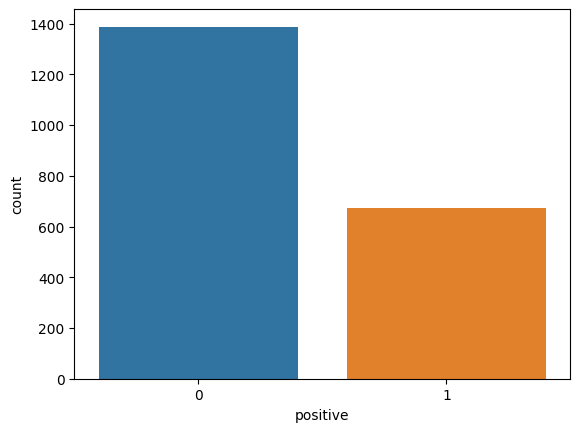

In [59]:
sns.countplot(x=df["positive"])

In [60]:
text=df['reviews']
label=df['positive']


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text,label,test_size=0.15)

In [62]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=2, batch_size = 32)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test), batch_size = 32)

Epoch 1/100
55/55 [==============================] - 24s 445ms/step - loss: 0.4726 - accuracy: 0.7824 - val_loss: 0.4749 - val_accuracy: 0.8026
Epoch 2/100
55/55 [==============================] - 25s 451ms/step - loss: 0.4692 - accuracy: 0.7858 - val_loss: 0.4718 - val_accuracy: 0.7832
Epoch 3/100
55/55 [==============================] - 24s 444ms/step - loss: 0.4568 - accuracy: 0.7944 - val_loss: 0.4671 - val_accuracy: 0.8091
Epoch 4/100
55/55 [==============================] - 24s 442ms/step - loss: 0.4650 - accuracy: 0.7904 - val_loss: 0.4758 - val_accuracy: 0.7702
Epoch 5/100
55/55 [==============================] - 24s 444ms/step - loss: 0.4595 - accuracy: 0.7910 - val_loss: 0.4636 - val_accuracy: 0.7929
Epoch 6/100
55/55 [==============================] - 24s 445ms/step - loss: 0.4633 - accuracy: 0.7870 - val_loss: 0.4766 - val_accuracy: 0.7605
Epoch 7/100
55/55 [==============================] - 24s 445ms/step - loss: 0.4553 - accuracy: 0.7950 - val_loss: 0.4636 - val_accuracy:

([<matplotlib.patches.Wedge at 0x7f9617248730>,
 [Text(-0.5711683696552354, 0.9400886625767703, 'No'),
  Text(0.6075154477242048, -0.9999124865589284, 'Yes')],
 [Text(-0.3115463834483102, 0.5127756341327837, '67.4%'),
  Text(0.3478934615172797, -0.5725994581149418, '32.6%')])

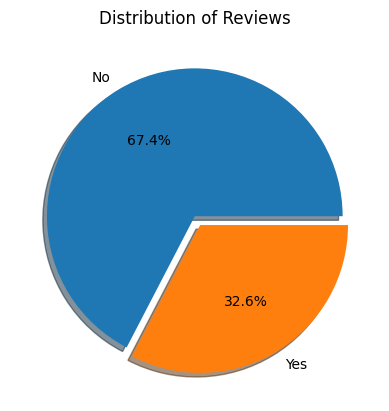

In [83]:
plt.title('Distribution of Reviews')
plt.pie(df['positive'].value_counts(), labels = ['No','Yes'],explode=(0,0.07), autopct='%1.1f%%', shadow=True)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)
baseline_score = model_0.score(X_test, y_test)

In [66]:
baseline_score

0.686084142394822

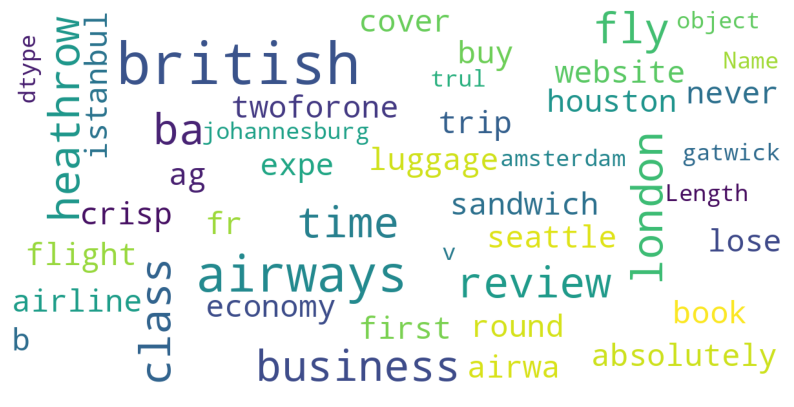

In [73]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.reviews)
